In [1]:
# Basic
import pandas as pd
import numpy as np
import random

# API
import requests

# ML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# 2. Data Collection - Pull Users

# Pull dummy users from API
url = 'https://dummyjson.com/users'
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    users = []
    for user in data['users']:
        users.append({
            'user_id': user['id'],
            'name': f"{user['firstName']} {user['lastName']}",
            'email': user['email'],
            'country': user['address']['country']
        })
    users_df = pd.DataFrame(users)
    print(users_df.head())
else:
    print(f"Error fetching users: {response.status_code}")


   user_id              name                             email        country
0        1     Emily Johnson     emily.johnson@x.dummyjson.com  United States
1        2  Michael Williams  michael.williams@x.dummyjson.com  United States
2        3      Sophia Brown      sophia.brown@x.dummyjson.com  United States
3        4       James Davis       james.davis@x.dummyjson.com  United States
4        5       Emma Miller       emma.miller@x.dummyjson.com  United States


In [3]:
# 3. Transaction Simulation

transactions = []

# Generate random transactions per user
for _, user in users_df.iterrows():
    num_transactions = random.randint(10, 20)  # 10-20 transactions per user
    for _ in range(num_transactions):
        amount = round(random.uniform(5.0, 5000.0), 2)  # $5 - $5000
        hour = random.randint(0, 23)  # Transaction hour (0-23)
        is_fraud = 0

        # Fraud rules
        if amount > 3000 or hour in [1, 2, 3]:  # Large or odd-hour transaction
            if random.random() < 0.3:
                is_fraud = 1
        else:
            if random.random() < 0.05:
                is_fraud = 1

        transactions.append({
            'user_id': user['user_id'],
            'transaction_amount': amount,
            'transaction_hour': hour,
            'country': user['country'],
            'is_fraud': is_fraud
        })

transactions_df = pd.DataFrame(transactions)
print(transactions_df.head())


   user_id  transaction_amount  transaction_hour        country  is_fraud
0        1             3609.98                 5  United States         0
1        1             1214.32                20  United States         0
2        1             1527.67                16  United States         0
3        1             1134.37                 9  United States         0
4        1             3157.38                14  United States         0


In [4]:
# 4. Data Preprocessing and EDA

# Overview
print(transactions_df.head())
print(transactions_df.info())
print(transactions_df.describe())

# Check class balance (fraud vs not fraud)
print(transactions_df['is_fraud'].value_counts(normalize=True))


   user_id  transaction_amount  transaction_hour        country  is_fraud
0        1             3609.98                 5  United States         0
1        1             1214.32                20  United States         0
2        1             1527.67                16  United States         0
3        1             1134.37                 9  United States         0
4        1             3157.38                14  United States         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             481 non-null    int64  
 1   transaction_amount  481 non-null    float64
 2   transaction_hour    481 non-null    int64  
 3   country             481 non-null    object 
 4   is_fraud            481 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 18.9+ KB
None
          user_id  transaction_amount  tr

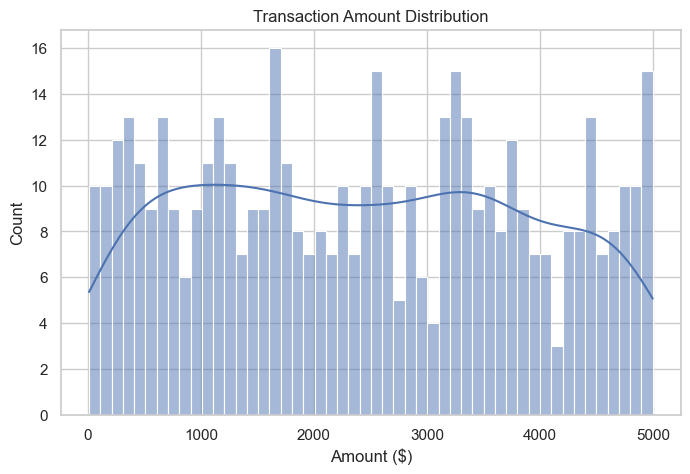

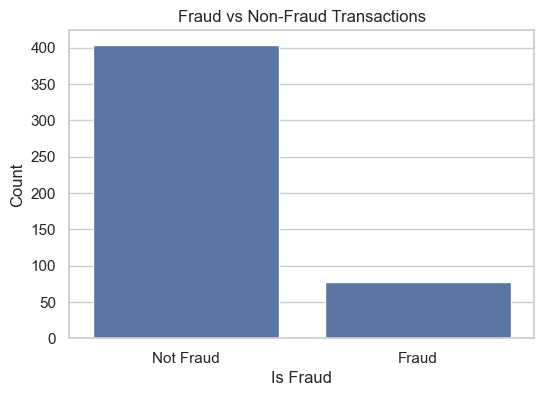

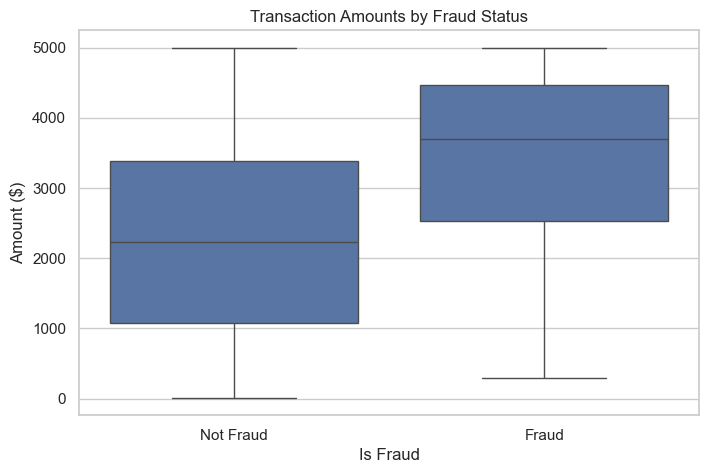

In [8]:
# 4.1 EDA Visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Histogram of transaction amounts
plt.figure(figsize=(8,5))
sns.histplot(transactions_df['transaction_amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount ($)')
plt.ylabel('Count')
plt.show()

# Bar plot of fraud vs non-fraud
plt.figure(figsize=(6,4))
sns.countplot(x='is_fraud', data=transactions_df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.xticks([0,1], ['Not Fraud', 'Fraud'])
plt.show()

# Boxplot: Amount by Fraud
plt.figure(figsize=(8,5))
sns.boxplot(x='is_fraud', y='transaction_amount', data=transactions_df)
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Amount ($)')
plt.xticks([0,1], ['Not Fraud', 'Fraud'])
plt.show()


In [5]:
# 5. Model Training

# Features and target
X = transactions_df[['transaction_amount', 'transaction_hour']]
y = transactions_df['is_fraud']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [6]:
# 6. Model Evaluation

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.88      0.88       125
           1       0.25      0.25      0.25        20

    accuracy                           0.79       145
   macro avg       0.56      0.56      0.56       145
weighted avg       0.79      0.79      0.79       145

[[110  15]
 [ 15   5]]


In [7]:
# 7. Save the model

import joblib

# Save the trained model to a file
joblib.dump(model, '../models/fraud_detection_model.pkl')

print("Model saved successfully!")


Model saved successfully!
